# Airline Dataset
---

## Importing Required Modules 

1. importing numpy for mathematical operation on arrays and dataframe.
2. importing pandas for reading data and data manipualtion.
3. importing matplotlib and seaborn to show the insights and  visualization from the dataset.
3. importing warnings for Warning messages that are typically issued in dataframe where it is useful to alert the user of some condition in a program, where that condition (normally) doesn t warrant raising an exception and terminating the program.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings("ignore")

In [7]:
sns.set(style = 'darkgrid')

## Reading Dataset and Checking the NaN Values , Data Types , and Statistical Analysis

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [4]:
df=pd.read_excel("Data_Train.xlsx")

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.shape

(10683, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.describe(include=object)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [12]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [13]:
df['Total_Stops'].mode()

0    1 stop
dtype: object

In [14]:
df['Route'].dtype

dtype('O')

In [15]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [16]:
df.isnull().sum().sum()

0

## From df.info() we can see that Date_of_Journey is a object data type
1.Therefore, we have to convert this datatype into timestamp so  that we can use that column properly to find the insights.

2.For this we require pandas **to_datetime** to convert object data type to datetime dtype.



In [17]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


In [18]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [25]:
df['Total_Stops'].mode()

0    1 stop
dtype: object

In [26]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

### We can see that Total_Stops is a Categorical column we can replace that column data into categories

In [19]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [20]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882


## 1st Insights: How many Flights with respect to their Stopages ?

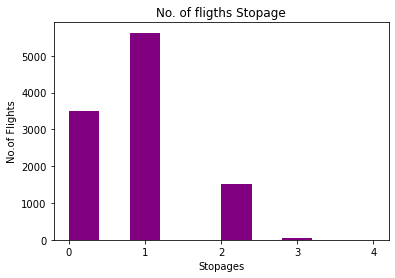

In [35]:
# From This Histogram  we can see that no.of flights and their Stopages
# In this Data maximum flights have 1 stopages 
# And there are few flights which have 3rd and 4th stopages 

plt.title('No. of fligths Stopage')
plt.hist(df['Total_Stops'],color='purple')
plt.xlabel('Stopages')
plt.ylabel('No.of Flights')
plt.xticks(df['Total_Stops'].unique())
plt.show()

In [21]:
df['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [ ]:
df['Total_stops'].unqiue()

In [23]:
df['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

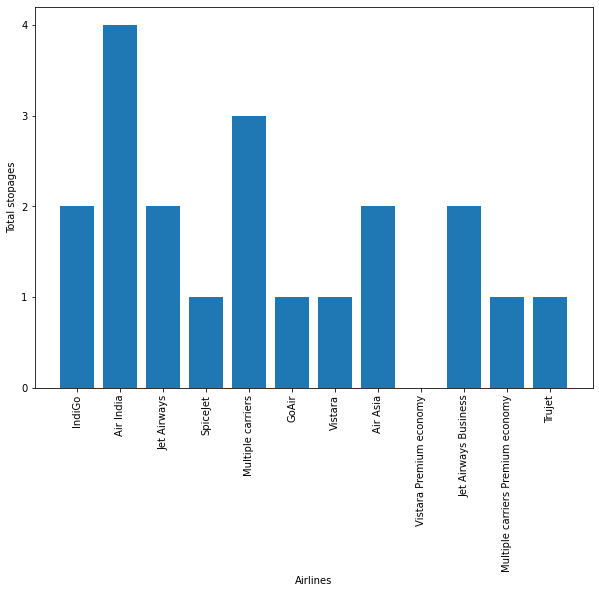

In [38]:
plt.figure(figsize=(10,7))
plt.bar(df['Airline'],df['Total_Stops'])
plt.xlabel('Airlines')
plt.ylabel('Total stopages')
plt.xticks(rotation=90)
plt.yticks(df['Total_Stops'].unique())
plt.show()


In [25]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [26]:
df[df['Total_Stops']==4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9182,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4,Change airports,17686


In [27]:
df[df['Airline']=='Vistara Premium economy']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
426,Vistara Premium economy,2019-03-03,Banglore,New Delhi,BLR → DEL,16:00,18:35,2h 35m,0,No info,11793
7657,Vistara Premium economy,2019-01-03,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,0,No info,9125
8615,Vistara Premium economy,2019-06-04,Banglore,Delhi,BLR → DEL,11:30,14:20,2h 50m,0,No info,5969


### 45 fligths have 3 Stopages

In [28]:
df.loc[df['Total_Stops']==3].count()

Airline            45
Date_of_Journey    45
Source             45
Destination        45
Route              45
Dep_Time           45
Arrival_Time       45
Duration           45
Total_Stops        45
Additional_Info    45
Price              45
dtype: int64

### Only 1 fligth have 4 Stopages

In [29]:
df[df['Total_Stops']==4].count()

Airline            1
Date_of_Journey    1
Source             1
Destination        1
Route              1
Dep_Time           1
Arrival_Time       1
Duration           1
Total_Stops        1
Additional_Info    1
Price              1
dtype: int64

# 2nd Insights: What flight is Expensive and Cheaper ?

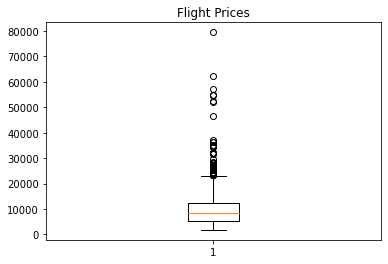

In [40]:

#This Boxplot show the Outliers in Flight Prices
#Only Vistara Premium Economy and Trujet has no Outliers
plt.boxplot(df['Price'])

plt.title('Flight Prices')
plt.show()

In [43]:
df['Price'].max()

79512

In [44]:
df[df['Price']==79512]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1,Business class,79512


# 3rd Insights: Variation of Flight Price from Source

C:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


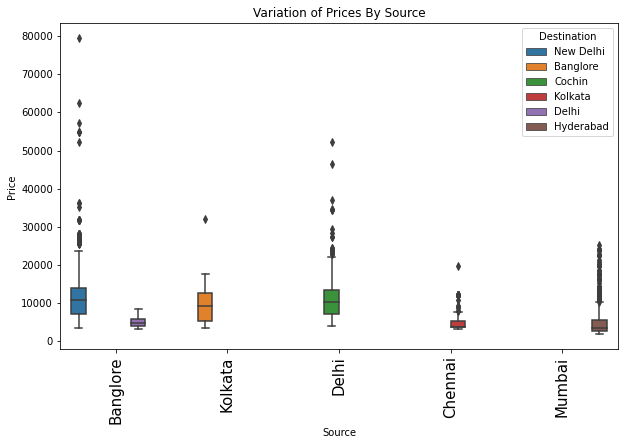

In [39]:
# From this boxplot we can see the maximum Outliers are in Bangalore and Minimum in KolKata
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(df['Source'],df['Price'],hue='Destination',data=df)
plt.xticks(rotation=90,size=15)
plt.title('Variation of Prices By Source')
plt.show()

In [32]:
type(df)

pandas.core.frame.DataFrame

In [33]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882


In [39]:
df['Date_of_Journey'].mode()

0   2019-05-18
dtype: datetime64[ns]

In [40]:
df['Date_of_Journey'].unique()

array(['2019-03-24T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-12-05T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-05-27T00:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2019-04-18T00:00:00.000000000',
       '2019-09-05T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-06-03T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-06-05T00:00:00.000000000', '2019-05-15T00:00:00.000000000',
       '2019-06-18T00:00:00.000000000', '2019-06-15T00:00:00.000000000',
       '2019-06-04T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-06-27T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-03-15

## Extracting Journey Day and Month
For this we require pandas **to_datetime** to convert object data type to datetime dtype.

.dt.day method will extract only day of that date

.dt.month method will extract only month of that date

In [45]:
df['Day_of_Journey']=df['Date_of_Journey'].dt.day
df['Month_of_Journey']=df['Date_of_Journey'].dt.month

# df['Day']=df['Date_of_Journey'].dt.day_name()
# df['Month']=df['Date_of_Journey'].dt.month_name()



In [47]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9


In [48]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df.drop(columns=['Date_of_Journey'],inplace=True)

In [49]:
df['Day_of_Journey'].unique()

array([24,  5,  6,  3, 27, 18, 15, 21,  4], dtype=int64)

In [58]:
z=list(df['Month_of_Journey'].unique())
z

[3, 1, 9, 12, 6, 5, 4]

# 5th Insights: On what Month have Maximum Flights Take off ?

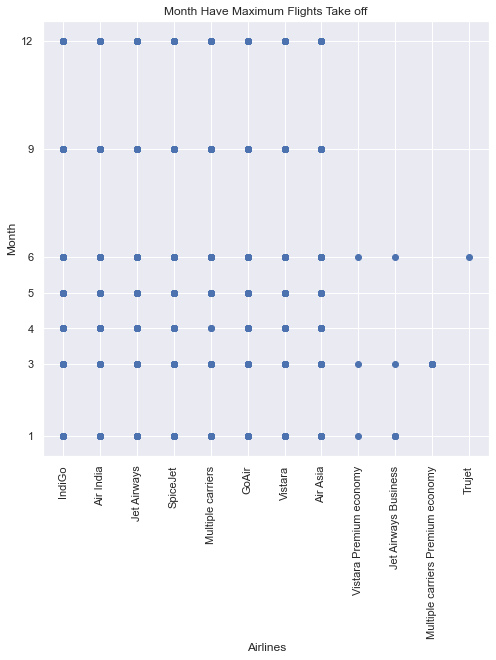

In [46]:
plt.figure(figsize=(8,8))
month=list(df['Month_of_Journey'])
airline=list(df['Airline'])
plt.scatter(airline,month)
plt.xticks(rotation=90)
plt.yticks(df['Month_of_Journey'].unique())
plt.title('Month Have Maximum Flights Take off')
plt.xlabel('Airlines')
plt.ylabel('Month')
plt.show()

In [227]:
df[df['Month_of_Journey']==10]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey


# 6th Insights: What Month has The Maximum Earning

In [59]:
df.groupby(['Month_of_Journey'])['Price'].agg(['sum'])

,sum
Month_of_Journey,
1,11279591
3,18647220
4,2217885
5,19414875
6,23369151
9,13429373
12,8719011


In [26]:
# Prices
z=df.groupby(['Month_of_Journey'])['Price'].agg(['sum']).iloc[:,0]
z=list(z)
z

[11279591, 18647220, 2217885, 19414875, 23369151, 13429373, 8719011]

In [58]:
# Month
a=df.groupby(['Month_of_Journey'])['Price'].agg(['sum']).index
# a=list(a)
a

Int64Index([1, 3, 4, 5, 6, 9, 12], dtype='int64', name='Month_of_Journey')

In [23]:
Y=list(df['Month_of_Journey'].unique())
Y

[3, 1, 9, 12, 6, 5, 4]

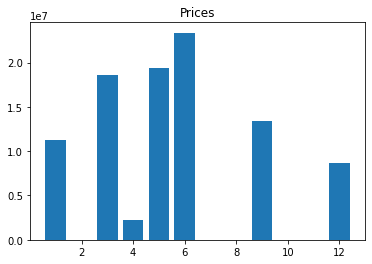

In [28]:
plt.bar(a,z)
plt.title('Prices')
plt.show()

In [72]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [73]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [60]:
df.replace({'New Delhi':'Delhi'},inplace=True)

In [61]:
df["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [63]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# 7th Insights: Checking the Availablity of Flight with respect to Source and Destination

In [54]:
df1=df.groupby(['Source','Destination',])['Airline'].value_counts()

In [55]:
df1

Source    Destination  Airline                          
Banglore  Delhi        Jet Airways                           788
                       IndiGo                                523
                       Air India                             332
                       Vistara                               185
                       SpiceJet                              181
                       GoAir                                  93
                       Air Asia                               89
                       Jet Airways Business                    4
                       Vistara Premium economy                 2
Chennai   Kolkata      IndiGo                                184
                       SpiceJet                              128
                       Vistara                                43
                       Air India                              25
                       Vistara Premium economy                 1
Delhi     Cochin       Jet Airway